In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# Set global parameters
mpl.rcParams['font.size'] = 14  # Set global font size for titles, labels, etc.
mpl.rcParams['axes.titlesize'] = 14  # Title size
mpl.rcParams['axes.labelsize'] = 14  # X and Y label size
mpl.rcParams['legend.fontsize'] = 14  # Legend font size
mpl.rcParams['xtick.labelsize'] = 14  # X-tick label size
mpl.rcParams['ytick.labelsize'] = 14  # Y-tick label size
mpl.rcParams['font.family'] = 'Arial'  # Set font family globally
# Set font weight for axis labels to bold
#mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['axes.titleweight'] = 'bold'  # Title weight (bold)

## Camera 1 focus

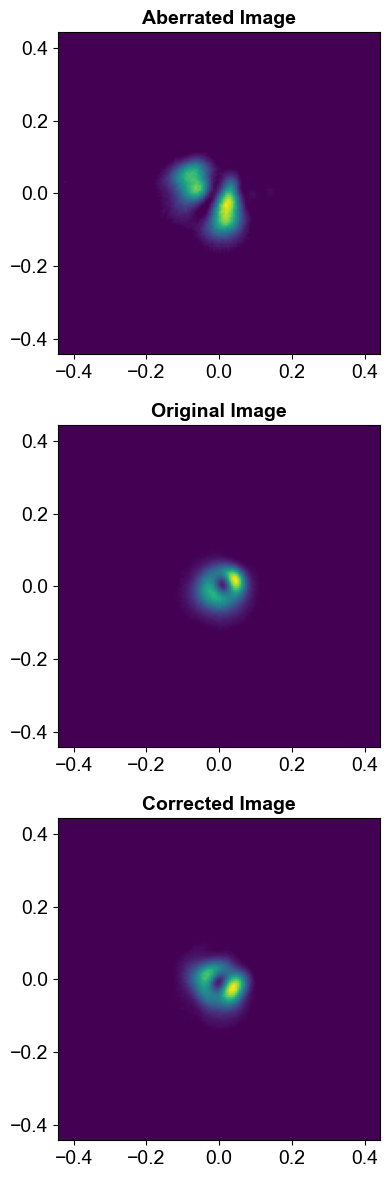

the aberrated coefficient: [0.5546493724677836]
the corrected coefficient: [0.8609748396321907]


In [2]:
import cv2
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from skimage import filters
from skimage.measure import regionprops

arr_abb = []
arr_cor = []

for i in range(1):
    # abberated
    #path_1 = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_1\1_idx_2024-07-22 16-12-02_c1_1.png"
    #path_1 = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_1\2_idx_2024-07-22 16-12-06_c1_1.png"
    #path_1 = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_1\5_idx_2024-07-22 16-12-18_c1_1.png"
    # original
    #path_2 = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\Reference_Image\camera_1\2024-07-22 15-51-00.png"
    # corrected
    #path_3 = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\compensatet_camera_1\1_idx_2024-08-05 11-07-02_c1_1.png"
    #path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\compensatet_camera_1\2_idx_2024-08-05 11-07-06_c1_1.png'
    #path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\compensatet_camera_1\5_idx_2024-08-05 11-07-18_c1_1.png'

    # best mse 122
    # path_1 = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_1\122_idx_2024-07-22 16-20-06_c1_1.png"
    # path_2 = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\Reference_Image\camera_1\2024-07-22 15-51-00.png"
    # path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\compensatet_camera_1\122_idx_2024-08-05 11-15-06_c1_1.png'

    # worst mse 108
    path_1 = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_1\108_idx_2024-07-22 16-19-10_c1_1.png"
    path_2 = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\Reference_Image\camera_1\2024-07-22 15-51-00.png"
    path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\compensatet_camera_1\108_idx_2024-08-05 11-14-10_c1_1.png'

    im1 = cv2.imread(path_1)
    im1 = rgb2gray(im1)
    im2 = cv2.imread(path_2)
    im2 = rgb2gray(im2)
    im3 = cv2.imread(path_3)
    im3 = rgb2gray(im3)
    
    image = im2
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid

    colorized = label2rgb(labeled_foreground, image, colors=['black', 'red'], alpha=0.1)

    # camera 1
    a = 80
    im1 = im1[1128-a:1128+a, 990-a:990+a]
    im1 = im1 / np.max(im1)
    im2 = im2[1128-a:1128+a, 990-a:990+a]
    im2 = im2 / np.max(im2)
    im3 = im3[1126-a:1126+a, 1085-a:1085+a]
    im3 = im3 / np.max(im3)

   
    
    xxx = np.linspace(-80*0.0055, 80*0.0055, 160)
    yyy = np.linspace(-80*0.0055, 80*0.0055, 160)
    dx = (xxx[1] - xxx[0]) / 2.
    dy = (yyy[1] - yyy[0]) / 2.
    extent = [xxx[0] - dx, xxx[-1] + dx, yyy[0] - dy, yyy[-1] + dy]
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

    ax1.imshow(im1, extent=extent)
    ax1.set_title("Aberrated Image")
    ax2.imshow(im2, extent=extent)
    ax2.set_title("Original Image")
    ax3.imshow(im3, extent=extent)
    ax3.set_title("Corrected Image")
    
    plt.tight_layout()
    plt.show()

    im1 = im1.flatten()
    im2 = im2.flatten()
    im3 = im3.flatten()
    
    im4 = im1
    im5 = im2
    im6 = im3
    
    co_abb = (np.sum(im4 * im5)) / np.sqrt(np.sum(im4**2)) / np.sqrt(np.sum(im5**2))
    arr_abb.append(co_abb)
    co_cor = (np.sum(im6 * im5)) / np.sqrt(np.sum(im6**2)) / np.sqrt(np.sum(im5**2))
    arr_cor.append(co_cor)

print('the aberrated coefficient:', arr_abb)
print('the corrected coefficient:', arr_cor)


# Camera 2 Defocus

(1072.1027272727272, 894.4257575757575)


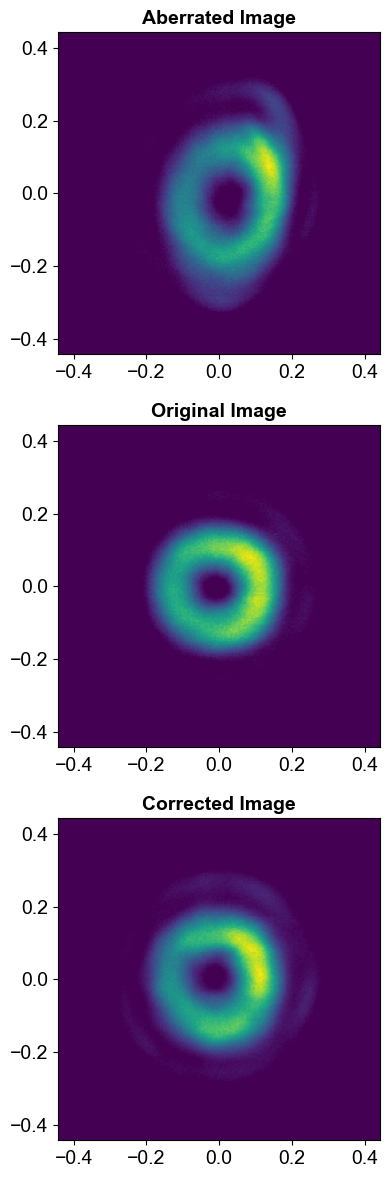

the aberrated coefficient: [0.8023530056475616]
the corrected coefficient: [0.9757510545393984]


In [3]:
import cv2
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from skimage import filters
from skimage.measure import regionprops

arr_abb = []
arr_cor = []

for i in range(1):
    #path_1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_2\1_idx_2024-07-22 16-12-02_c2_1.png'
    #path_2 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\Reference_Image\camera_2\2024-07-22 15-51-13.png'
    #path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\compensatet_camera_2\1_idx_2024-08-05 11-07-02_c2_1.png'

    # path_1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_2\2_idx_2024-07-22 16-12-06_c2_1.png'
    # path_2 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\Reference_Image\camera_2\2024-07-22 15-51-13.png'
    # path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\compensatet_camera_2\2_idx_2024-08-05 11-07-06_c2_1.png'

    # path_1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_2\3_idx_2024-07-22 16-12-10_c2_1.png'
    # path_2 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\Reference_Image\camera_2\2024-07-22 15-51-13.png'
    # path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\compensatet_camera_2\3_idx_2024-08-05 11-07-10_c2_1.png'

    # path_1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_2\5_idx_2024-07-22 16-12-18_c2_1.png'
    # path_2 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\Reference_Image\camera_2\2024-07-22 15-51-13.png'
    # path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\compensatet_camera_2\5_idx_2024-08-05 11-07-18_c2_1.png'

    # best prediction mse
    path_1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_2\108_idx_2024-07-22 16-19-10_c2_1.png'
    path_2 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\Reference_Image\camera_2\2024-07-22 15-51-13.png'
    path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\compensatet_camera_2\108_idx_2024-08-05 11-14-10_c2_1.png'

    # worst prediction mse
    # path_1 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_2\122_idx_2024-07-22 16-20-06_c2_1.png'
    # path_2 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\Reference_Image\camera_2\2024-07-22 15-51-13.png'
    # path_3 = r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\compensatet_camera_2\122_idx_2024-08-05 11-15-06_c2_1.png'


    im1 = cv2.imread(path_1)
    im1 = rgb2gray(im1)
    im2 = cv2.imread(path_2)
    im2 = rgb2gray(im2)
    im3 = cv2.imread(path_3)
    im3 = rgb2gray(im3)
    
    image = im3
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid
    print(center_of_mass)
    colorized = label2rgb(labeled_foreground, image, colors=['black', 'red'], alpha=0.1)

    # camera 1
    a = 120
    im1 = im1[1072-a:1072+a, 894-a:894+a]
    im1 = im1 / np.max(im1)
    im2 = im2[1072-a:1072+a, 894-a:894+a]
    im2 = im2 / np.max(im2)
    im3 = im3[1072-a:1072+a, 894-a:894+a]
    im3 = im3 / np.max(im3)

   
    
    xxx = np.linspace(-80*0.0055, 80*0.0055, 160)
    yyy = np.linspace(-80*0.0055, 80*0.0055, 160)
    dx = (xxx[1] - xxx[0]) / 2.
    dy = (yyy[1] - yyy[0]) / 2.
    extent = [xxx[0] - dx, xxx[-1] + dx, yyy[0] - dy, yyy[-1] + dy]
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

    ax1.imshow(im1, extent=extent)
    ax1.set_title("Aberrated Image")
    ax2.imshow(im2, extent=extent)
    ax2.set_title("Original Image")
    ax3.imshow(im3, extent=extent)
    ax3.set_title("Corrected Image")
    
    plt.tight_layout()
    plt.show()

    im1 = im1.flatten()
    im2 = im2.flatten()
    im3 = im3.flatten()
    
    im4 = im1
    im5 = im2
    im6 = im3
    
    co_abb = (np.sum(im4 * im5)) / np.sqrt(np.sum(im4**2)) / np.sqrt(np.sum(im5**2))
    arr_abb.append(co_abb)
    co_cor = (np.sum(im6 * im5)) / np.sqrt(np.sum(im6**2)) / np.sqrt(np.sum(im5**2))
    arr_cor.append(co_cor)

print('the aberrated coefficient:', arr_abb)
print('the corrected coefficient:', arr_cor)

# Calculate the Korrelationcoefficient Camera 1

In [4]:
#import the images 
from scipy import signal
import cv2
import numpy as np
# check the center and crop the image
import matplotlib.pyplot as plt
from skimage.color import label2rgb
import imageio as iio
from skimage import filters
from skimage.color import rgb2gray  # only needed for incorrectly saved images
from skimage.measure import regionprops
import os
#calculate the coefficient from the equation in our paper
arr_abb=[]
arr_cor=[]
 
 
for i in range(1,201):
    # abberated
    path_1= r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_1'
    # compensated
    path_2= r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\compensatet_camera_1'
    # corrected
    path_3= r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\Reference_Image\camera_1'

    # Read aberrated image
    aberrated_files = [f for f in os.listdir(path_1) if f.startswith(f"{i}_")]
    if aberrated_files:
        print(aberrated_files)
        im1 = cv2.imread(os.path.join(path_1, aberrated_files[0]))
        im1 = rgb2gray(im1)
        #print(np.shape(im1))
    
    # Read compensated image
    compensated_files = [f for f in os.listdir(path_2) if f.startswith(f"{i}_")]
    if compensated_files:
        print(compensated_files)
        im2 = cv2.imread(os.path.join(path_2, compensated_files[0]))
        im2 = rgb2gray(im2)
        #print(np.shape(im2))
    
    # Read reference image (assuming there's only one reference image)
    im3 = cv2.imread(os.path.join(path_3, '2024-07-22 15-51-00.png'))
    im3 = rgb2gray(im3)
    #print(np.shape(im3))

    image=im3
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid
    print(center_of_mass)
    colorized = label2rgb(labeled_foreground, image, colors=['black', 'red'], alpha=0.1)
 
    a=80
    im1=im1[1128-a:1128+a,990-a:990+a]
    im1=im1/np.max(im1)
    im2=im2[1126-a:1126+a,1085-a:1085+a] # corrected image different focus
    im2=im2/np.max(im2)
    im3=im3[1128-a:1128+a,990-a:990+a]
    im3=im3/np.max(im3)
    
    # plot the physical coordinate
    xxx=np.linspace(-80*0.0055,80*0.0055, 160)
    yyy=np.linspace(-80*0.0055,80*0.0055, 160)
    dx = (xxx[1]-xxx[0])/2.
    dy = (yyy[1]-yyy[0])/2.
    extent = [xxx[0]-dx,  xxx[-1]+dx, yyy[0]-dy, yyy[-1]+dy]      # xx[-1] is the last paramter
    #fig, [ax1, ax2, ax3] = plt.subplots(3,1)
 
    #ax1.imshow(im1,extent=extent)
    #ax2.imshow(im2,extent=extent)
    #ax3.imshow(im3,extent=extent)
    im1=im1.flatten()
    im2=im2.flatten()
    im3=im3.flatten()
    # same like Matlab coeff
    im4 = im1 # abberated
    im5 = im2 # compensated
    im6 = im3 # original
    
    co_abb = (np.sum(im4 * im6)) / np.sqrt(np.sum(im4**2)) / np.sqrt(np.sum(im6**2))
    arr_abb.append(co_abb)
    print(arr_abb)
    co_cor = (np.sum(im5 * im6)) / np.sqrt(np.sum(im5**2)) / np.sqrt(np.sum(im6**2))
    arr_cor.append(co_cor)
    print(arr_cor)

print('the aberrated coefficient:',arr_abb)
print('the corrected coefficient:',arr_cor)

['1_idx_2024-07-22 16-12-02_c1_1.png']
['1_idx_2024-08-05 11-07-02_c1_1.png']
(1128.537796976242, 990.6609071274298)
[0.29957708954745055]
[0.9261118264808339]
['2_idx_2024-07-22 16-12-06_c1_1.png']
['2_idx_2024-08-05 11-07-06_c1_1.png']
(1128.537796976242, 990.6609071274298)
[0.29957708954745055, 0.5794839788823793]
[0.9261118264808339, 0.9333576117462115]
['3_idx_2024-07-22 16-12-10_c1_1.png']
['3_idx_2024-08-05 11-07-10_c1_1.png']
(1128.537796976242, 990.6609071274298)
[0.29957708954745055, 0.5794839788823793, 0.6469508392597685]
[0.9261118264808339, 0.9333576117462115, 0.8911885976177538]
['4_idx_2024-07-22 16-12-14_c1_1.png']
['4_idx_2024-08-05 11-07-14_c1_1.png']
(1128.537796976242, 990.6609071274298)
[0.29957708954745055, 0.5794839788823793, 0.6469508392597685, 0.702821676728691]
[0.9261118264808339, 0.9333576117462115, 0.8911885976177538, 0.9499063336772511]
['5_idx_2024-07-22 16-12-18_c1_1.png']
['5_idx_2024-08-05 11-07-18_c1_1.png']
(1128.537796976242, 990.6609071274298)
[0.2

## Plot the result

Index: 122, MSE: 0.0004869888362009078
Index: 95, MSE: 0.0005394055042415857
Index: 58, MSE: 0.0007447426905855536
Index: 7, MSE: 0.0008553784573450685
Index: 77, MSE: 0.0009108142112381756
Index: 104, MSE: 0.0009352544439025223
Index: 192, MSE: 0.0009695041226223111
Index: 93, MSE: 0.0011651276145130396
Index: 187, MSE: 0.0012172675924375653
Index: 40, MSE: 0.0012182025238871574
Index: 6, MSE: 0.0012210733257234097
Index: 34, MSE: 0.0012688577407971025
Index: 139, MSE: 0.001393250422552228
Index: 100, MSE: 0.0015028457855805755
Index: 15, MSE: 0.0015142520423978567
Index: 78, MSE: 0.00158326281234622
Index: 38, MSE: 0.001717093982733786
Index: 54, MSE: 0.0017343267099931836
Index: 88, MSE: 0.0017590905772522092
Index: 49, MSE: 0.0017712184926494956
Index: 198, MSE: 0.001958665670827031
Index: 102, MSE: 0.001974640414118767
Index: 51, MSE: 0.0019803019240498543
Index: 65, MSE: 0.0020019777584820986
Index: 8, MSE: 0.0020041922107338905
Index: 37, MSE: 0.002006686059758067
Index: 171, MS

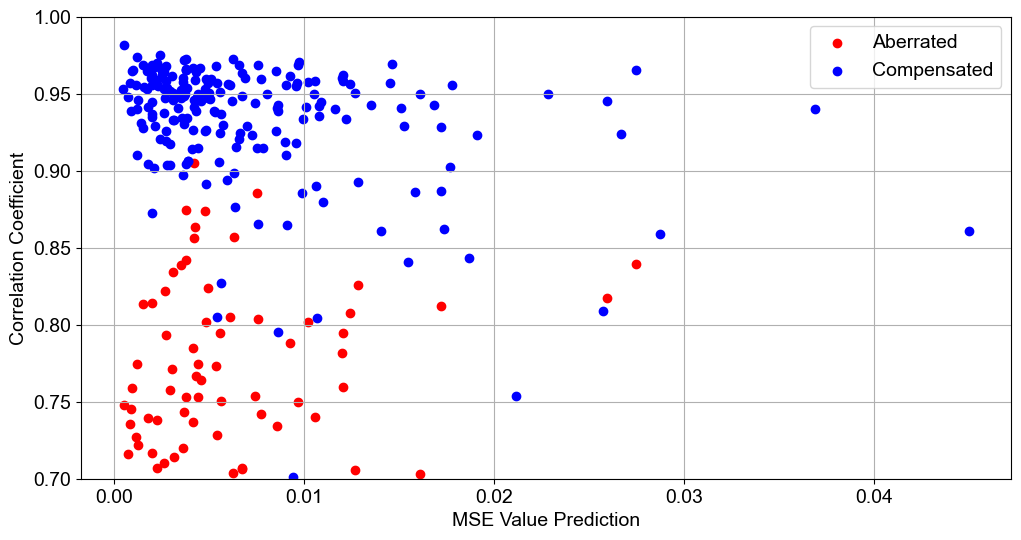

In [39]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Datei einlesen
with open(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\MSE_unwrapped.txt') as file:
    content = file.readlines()

# MSE-Werte extrahieren
mse_values = []
mse_count = 0
for line in content:
    match = re.search(r'MSE: (\d+\.\d+)', line)
    if match:
        mse_count += 1
        mse_values.append((mse_count, float(match.group(1))))
        if mse_count == 200:
            break

# Sortiere die MSE-Werte und behalte die Indizes
sorted_mse_indices_with_mse = sorted(mse_values, key=lambda x: x[1])

# Ausgabe zur Überprüfung
for index, mse in sorted_mse_indices_with_mse:
    print(f"Index: {index}, MSE: {mse}")

# Extrahiere die MSE-Werte in der sortierten Reihenfolge
sorted_mse_values = [mse for _, mse in sorted_mse_indices_with_mse]

# Extrahiere die Indizes in der sortierten Reihenfolge
sorted_indices = [index for index, _ in sorted_mse_indices_with_mse]

# Konvertiere die Indizes in ein numpy-Array und passe an für 0-basiertes Indexing
sorted_indices_array = np.array(sorted_indices).astype(int) - 1  # Sicherstellen, dass es ein 1D-Array ist

# Konvertiere arr_abb und arr_cor in NumPy-Arrays, falls sie Listen sind
arr_abb = np.array(arr_abb)
arr_cor = np.array(arr_cor)

# Überprüfung der Array-Formen
print(f"Shape of sorted_indices_array: {sorted_indices_array.shape}")
print(f"Shape of arr_abb: {arr_abb.shape}")
print(f"Shape of arr_cor: {arr_cor.shape}")

# Reordne die Arrays basierend auf den sortierten Indizes
arr_abb_sorted = arr_abb[sorted_indices_array]  # arr_abb wird mit 1D-Array indiziert
arr_cor_sorted = arr_cor[sorted_indices_array]  # arr_cor wird mit 1D-Array indiziert

# Berechnungen wie vorher
improvement = arr_cor_sorted - arr_abb_sorted
mean_improvement = np.mean(improvement)
mean_arr_abb = np.mean(arr_abb_sorted)
mean_arr_cor = np.mean(arr_cor_sorted)

# Ergebnisse drucken
print(f"Mean Improvement: {mean_improvement}")
print(f"Mean Correlationcoefficient Aberration: {mean_arr_abb}")
print(f"Mean Correlationcoefficient Correction: {mean_arr_cor}")

# Plotten
plt.figure(figsize=(12, 6))

# Plot von arr_abb_sorted und arr_cor_sorted gegen die sortierten MSE-Werte
plt.scatter(sorted_mse_values, arr_abb_sorted, label="Aberrated", color='red')
plt.scatter(sorted_mse_values, arr_cor_sorted, label="Compensated", color='blue')

plt.xlabel("MSE Value Prediction")
plt.ylabel("Correlation Coefficient")
plt.legend()  # Legenden-Schriftgröße anpassen
plt.xticks()  # x-Achse Beschriftung Schriftgröße anpassen
plt.yticks()  # y-Achse Beschriftung Schriftgröße anpassen
plt.ylim((0.7,1))
plt.grid(True)
plt.show()


200
200
Mean Improvement: 0.3032236125062799
Mean Correlationcoefficient Abberation: 0.629707759583706
Mean Correlationcoefficient Correction: 0.9329313720899859


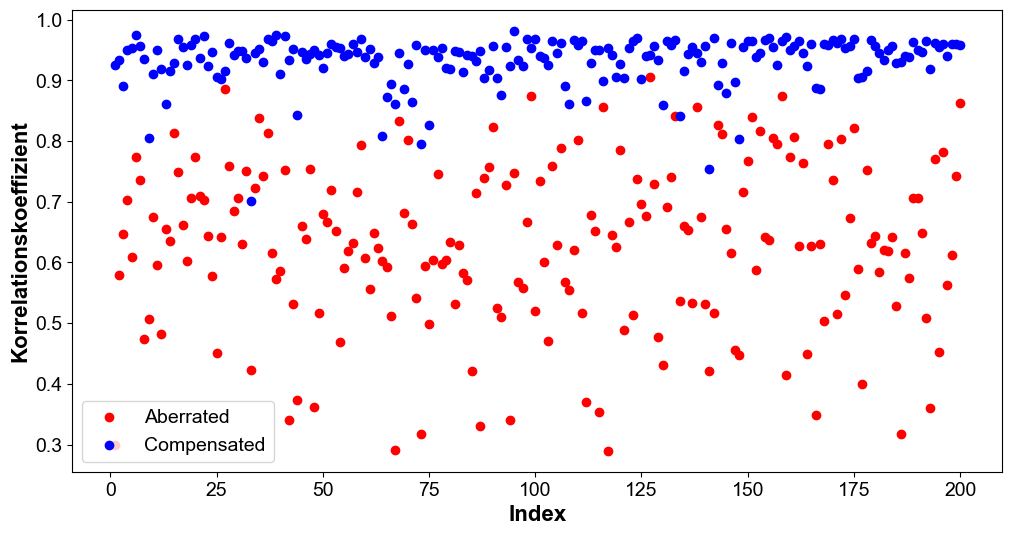

In [6]:
print(len(arr_abb))
print(len(arr_cor))
# Calculate the mean improvement
arr_abb = np.array(arr_abb)
arr_cor = np.array(arr_cor)

# Calculate the improvement for each pair of values
improvement = arr_cor - arr_abb


# Calculate the mean improvement
mean_improvement = np.mean(improvement)
mean_arr_abb = np.mean(arr_abb)
mean_arr_cor = np.mean(arr_cor)

# Print the mean improvement
print(f"Mean Improvement: {mean_improvement}")
print(f"Mean Correlationcoefficient Abberation: {mean_arr_abb}")
print(f"Mean Correlationcoefficient Correction: {mean_arr_cor}")

plt.figure(figsize=(12, 6))

plt.scatter(range(1, len(arr_abb) + 1), arr_abb, label="Aberrated", color='red')
plt.scatter(range(1, len(arr_cor) + 1), arr_cor, label="Compensated", color='blue')
#plt.title(" Camera 2 Aberrated vs Compensated", fontdict={'fontsize': 12, 'fontname': 'Arial', 'fontweight': 'bold'})
plt.xlabel("Index", fontdict={'fontsize': 16, 'fontname': 'Arial', 'fontweight': 'bold'})
plt.ylabel("Korrelationskoeffizient", fontdict={'fontsize': 16, 'fontname': 'Arial', 'fontweight': 'bold'})
plt.legend(fontsize=14)  # Adjusting legend font size
plt.xticks(fontsize=14)  # Adjusting x-tick labels font size
plt.yticks(fontsize=14)  # Adjusting y-tick labels font size
plt.show()

# Calculate the Correlation Coeff Camera 2

In [7]:
#import the images 
from scipy import signal
import cv2
import numpy as np
# check the center and crop the image
import matplotlib.pyplot as plt
from skimage.color import label2rgb
import imageio as iio
from skimage import filters
from skimage.color import rgb2gray  # only needed for incorrectly saved images
from skimage.measure import regionprops
import os
#calculate the coefficient from the equation in our paper
arr_abb=[]
arr_cor=[]
 
 
for i in range(1,201):
    # abberated
    path_1= r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_2'
    # compensated
    path_2= r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\compensatet_camera_2'
    # corrected
    path_3= r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\Reference_Image\camera_2'

    # Read aberrated image
    aberrated_files = [f for f in os.listdir(path_1) if f.startswith(f"{i}_")]
    if aberrated_files:
        print(aberrated_files)
        im1 = cv2.imread(os.path.join(path_1, aberrated_files[0]))
        im1 = rgb2gray(im1)
        #print(np.shape(im1))
    
    # Read compensated image
    compensated_files = [f for f in os.listdir(path_2) if f.startswith(f"{i}_")]
    if compensated_files:
        print(compensated_files)
        im2 = cv2.imread(os.path.join(path_2, compensated_files[0]))
        im2 = rgb2gray(im2)
        #print(np.shape(im2))
    
    # Read reference image (assuming there's only one reference image)
    im3 = cv2.imread(os.path.join(path_3, '2024-07-22 15-51-13.png'))
    im3 = rgb2gray(im3)
    #print(np.shape(im3))

    image=im3
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid
    print(center_of_mass)
    colorized = label2rgb(labeled_foreground, image, colors=['black', 'red'], alpha=0.1)
 
    a = 80
    im1 = im1[1072-a:1072+a, 894-a:894+a]
    im1 = im1 / np.max(im1)
    im2 = im2[1072-a:1072+a, 894-a:894+a]
    im2 = im2 / np.max(im2)
    im3 = im3[1072-a:1072+a, 894-a:894+a]
    im3 = im3 / np.max(im3)
    
    # plot the physical coordinate
    xxx=np.linspace(-80*0.0055,80*0.0055, 160)
    yyy=np.linspace(-80*0.0055,80*0.0055, 160)
    dx = (xxx[1]-xxx[0])/2.
    dy = (yyy[1]-yyy[0])/2.
    extent = [xxx[0]-dx,  xxx[-1]+dx, yyy[0]-dy, yyy[-1]+dy]      # xx[-1] is the last paramter
    #fig, [ax1, ax2, ax3] = plt.subplots(3,1)
 
    #ax1.imshow(im1,extent=extent)
    #ax2.imshow(im2,extent=extent)
    #ax3.imshow(im3,extent=extent)
    im1=im1.flatten()
    im2=im2.flatten()
    im3=im3.flatten()
    # same like Matlab coeff
    im4 = im1 # abberated
    im5 = im2 # compensated
    im6 = im3 # original
    
    co_abb = (np.sum(im4 * im6)) / np.sqrt(np.sum(im4**2)) / np.sqrt(np.sum(im6**2))
    arr_abb.append(co_abb)
    print(arr_abb)
    co_cor = (np.sum(im5 * im6)) / np.sqrt(np.sum(im5**2)) / np.sqrt(np.sum(im6**2))
    arr_cor.append(co_cor)
    print(arr_cor)

print('the aberrated coefficient:',arr_abb)
print('the corrected coefficient:',arr_cor)

['1_idx_2024-07-22 16-12-02_c2_1.png']
['1_idx_2024-08-05 11-07-02_c2_1.png']
(1072.5889264445518, 894.3231933043618)
[0.7541780605652882]
[0.860636621769688]
['2_idx_2024-07-22 16-12-06_c2_1.png']
['2_idx_2024-08-05 11-07-06_c2_1.png']
(1072.5889264445518, 894.3231933043618)
[0.7541780605652882, 0.8896702214667397]
[0.860636621769688, 0.9656802401214357]
['3_idx_2024-07-22 16-12-10_c2_1.png']
['3_idx_2024-08-05 11-07-10_c2_1.png']
(1072.5889264445518, 894.3231933043618)
[0.7541780605652882, 0.8896702214667397, 0.895115854162928]
[0.860636621769688, 0.9656802401214357, 0.9700414008842998]
['4_idx_2024-07-22 16-12-14_c2_1.png']
['4_idx_2024-08-05 11-07-14_c2_1.png']
(1072.5889264445518, 894.3231933043618)
[0.7541780605652882, 0.8896702214667397, 0.895115854162928, 0.7958876788022475]
[0.860636621769688, 0.9656802401214357, 0.9700414008842998, 0.9432232205854152]
['5_idx_2024-07-22 16-12-18_c2_1.png']
['5_idx_2024-08-05 11-07-18_c2_1.png']
(1072.5889264445518, 894.3231933043618)
[0.75417

## Plot the results

Index: 122, MSE: 0.0004869888362009078
Index: 95, MSE: 0.0005394055042415857
Index: 58, MSE: 0.0007447426905855536
Index: 7, MSE: 0.0008553784573450685
Index: 77, MSE: 0.0009108142112381756
Index: 104, MSE: 0.0009352544439025223
Index: 192, MSE: 0.0009695041226223111
Index: 93, MSE: 0.0011651276145130396
Index: 187, MSE: 0.0012172675924375653
Index: 40, MSE: 0.0012182025238871574
Index: 6, MSE: 0.0012210733257234097
Index: 34, MSE: 0.0012688577407971025
Index: 139, MSE: 0.001393250422552228
Index: 100, MSE: 0.0015028457855805755
Index: 15, MSE: 0.0015142520423978567
Index: 78, MSE: 0.00158326281234622
Index: 38, MSE: 0.001717093982733786
Index: 54, MSE: 0.0017343267099931836
Index: 88, MSE: 0.0017590905772522092
Index: 49, MSE: 0.0017712184926494956
Index: 198, MSE: 0.001958665670827031
Index: 102, MSE: 0.001974640414118767
Index: 51, MSE: 0.0019803019240498543
Index: 65, MSE: 0.0020019777584820986
Index: 8, MSE: 0.0020041922107338905
Index: 37, MSE: 0.002006686059758067
Index: 171, MS

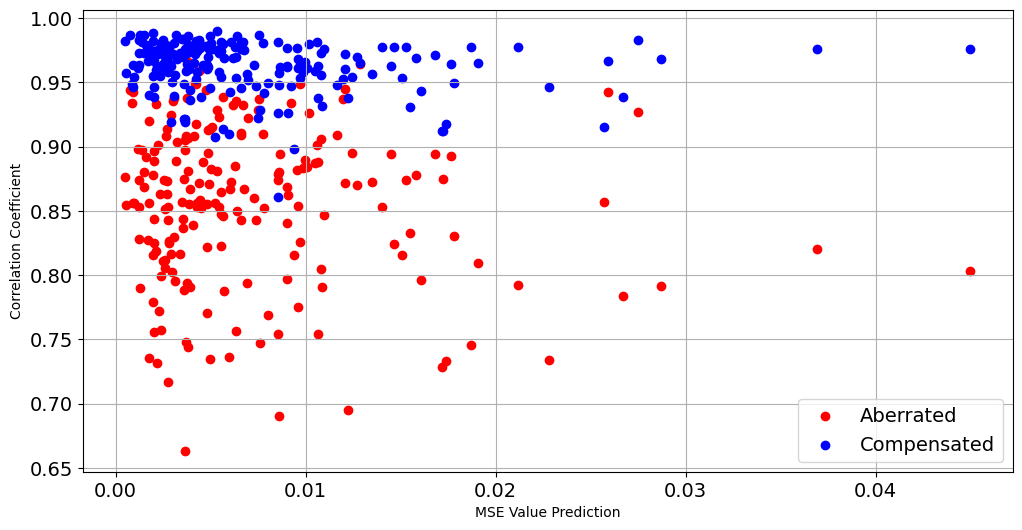

In [32]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Datei einlesen
with open(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\MSE_unwrapped.txt') as file:
    content = file.readlines()

# MSE-Werte extrahieren
mse_values = []
mse_count = 0
for line in content:
    match = re.search(r'MSE: (\d+\.\d+)', line)
    if match:
        mse_count += 1
        mse_values.append((mse_count, float(match.group(1))))
        if mse_count == 200:
            break

# Sortiere die MSE-Werte und behalte die Indizes
sorted_mse_indices_with_mse = sorted(mse_values, key=lambda x: x[1])

# Ausgabe zur Überprüfung
for index, mse in sorted_mse_indices_with_mse:
    print(f"Index: {index}, MSE: {mse}")

# Extrahiere die MSE-Werte in der sortierten Reihenfolge
sorted_mse_values = [mse for _, mse in sorted_mse_indices_with_mse]

# Extrahiere die Indizes in der sortierten Reihenfolge
sorted_indices = [index for index, _ in sorted_mse_indices_with_mse]

# Konvertiere die Indizes in ein numpy-Array und passe an für 0-basiertes Indexing
sorted_indices_array = np.array(sorted_indices).astype(int) - 1  # Sicherstellen, dass es ein 1D-Array ist
print(sorted_mse_indices_with_mse)

# Konvertiere arr_abb und arr_cor in NumPy-Arrays, falls sie Listen sind
arr_abb = np.array(arr_abb)
arr_cor = np.array(arr_cor)

# Überprüfung der Array-Formen
print(f"Shape of sorted_indices_array: {sorted_indices_array.shape}")
print(f"Shape of arr_abb: {arr_abb.shape}")
print(f"Shape of arr_cor: {arr_cor.shape}")

# Reordne die Arrays basierend auf den sortierten Indizes
arr_abb_sorted = arr_abb[sorted_indices_array]  
print(arr_abb)
print(arr_abb_sorted)
arr_cor_sorted = arr_cor[sorted_indices_array]  

# Berechnungen wie vorher
improvement = arr_cor_sorted - arr_abb_sorted
mean_improvement = np.mean(improvement)
mean_arr_abb = np.mean(arr_abb_sorted)
mean_arr_cor = np.mean(arr_cor_sorted)

# Ergebnisse drucken
print(f"Mean Improvement: {mean_improvement}")
print(f"Mean Correlationcoefficient Aberration: {mean_arr_abb}")
print(f"Mean Correlationcoefficient Correction: {mean_arr_cor}")

# Plotten
plt.figure(figsize=(12, 6))

# Plot von arr_abb_sorted und arr_cor_sorted gegen die sortierten MSE-Werte
plt.scatter(sorted_mse_values, arr_abb_sorted, label="Aberrated", color='red')
plt.scatter(sorted_mse_values, arr_cor_sorted, label="Compensated", color='blue')

plt.xlabel("MSE Value Prediction")
plt.ylabel("Correlation Coefficient")
plt.legend(fontsize=14)  # Legenden-Schriftgröße anpassen
plt.xticks(fontsize=14)  # x-Achse Beschriftung Schriftgröße anpassen
plt.yticks(fontsize=14)  # y-Achse Beschriftung Schriftgröße anpassen
#plt.ylim((0.85,1))
plt.grid(True)
plt.show()

Index: 122, MSE: 0.0004869888362009078
Index: 95, MSE: 0.0005394055042415857
Index: 58, MSE: 0.0007447426905855536
Index: 7, MSE: 0.0008553784573450685
Index: 77, MSE: 0.0009108142112381756
Index: 104, MSE: 0.0009352544439025223
Index: 192, MSE: 0.0009695041226223111
Index: 93, MSE: 0.0011651276145130396
Index: 187, MSE: 0.0012172675924375653
Index: 40, MSE: 0.0012182025238871574
Index: 6, MSE: 0.0012210733257234097
Index: 34, MSE: 0.0012688577407971025
Index: 139, MSE: 0.001393250422552228
Index: 100, MSE: 0.0015028457855805755
Index: 15, MSE: 0.0015142520423978567
Index: 78, MSE: 0.00158326281234622
Index: 38, MSE: 0.001717093982733786
Index: 54, MSE: 0.0017343267099931836
Index: 88, MSE: 0.0017590905772522092
Index: 49, MSE: 0.0017712184926494956
Index: 198, MSE: 0.001958665670827031
Index: 102, MSE: 0.001974640414118767
Index: 51, MSE: 0.0019803019240498543
Index: 65, MSE: 0.0020019777584820986
Index: 8, MSE: 0.0020041922107338905
Index: 37, MSE: 0.002006686059758067
Index: 171, MS

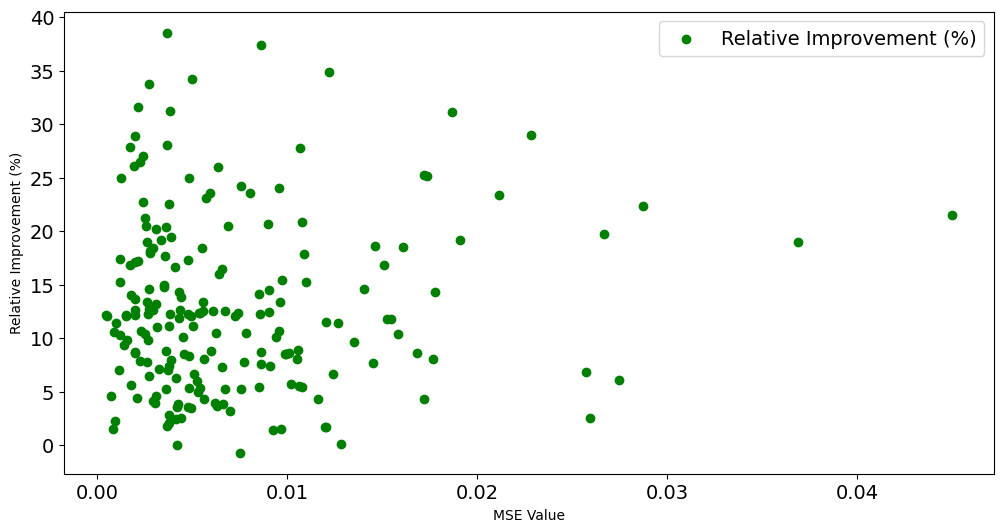

In [31]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Datei einlesen
with open(r'\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\MSE_unwrapped.txt') as file:
    content = file.readlines()

# MSE-Werte extrahieren
mse_values = []
mse_count = 0
for line in content:
    match = re.search(r'MSE: (\d+\.\d+)', line)
    if match:
        mse_count += 1
        mse_values.append((mse_count, float(match.group(1))))
        if mse_count == 200:
            break

# Sortiere die MSE-Werte und behalte die Indizes
sorted_mse_indices_with_mse = sorted(mse_values, key=lambda x: x[1])

# Ausgabe zur Überprüfung
for index, mse in sorted_mse_indices_with_mse:
    print(f"Index: {index}, MSE: {mse}")

# Extrahiere die MSE-Werte in der sortierten Reihenfolge
sorted_mse_values = [mse for _, mse in sorted_mse_indices_with_mse]

# Extrahiere die Indizes in der sortierten Reihenfolge
sorted_indices = [index for index, _ in sorted_mse_indices_with_mse]

# Konvertiere die Indizes in ein numpy-Array und passe an für 0-basiertes Indexing
sorted_indices_array = np.array(sorted_indices).astype(int) - 1  # Sicherstellen, dass es ein 1D-Array ist

# Konvertiere arr_abb und arr_cor in NumPy-Arrays, falls sie Listen sind
arr_abb = np.array(arr_abb)
arr_cor = np.array(arr_cor)

# Überprüfung der Array-Formen
print(f"Shape of sorted_indices_array: {sorted_indices_array.shape}")
print(f"Shape of arr_abb: {arr_abb.shape}")
print(f"Shape of arr_cor: {arr_cor.shape}")

# Reordne die Arrays basierend auf den sortierten Indizes
arr_abb_sorted = arr_abb[sorted_indices_array]  # arr_abb wird mit 1D-Array indiziert
arr_cor_sorted = arr_cor[sorted_indices_array]  # arr_cor wird mit 1D-Array indiziert

# Berechnung der relativen Verbesserung
relative_improvement = ((arr_cor_sorted - arr_abb_sorted) / arr_abb_sorted) * 100

# Berechnung der mittleren relativen Verbesserung
mean_relative_improvement = np.mean(relative_improvement)

# Ergebnisse drucken
print(f"Mean Relative Improvement: {mean_relative_improvement:.2f}%")

# Plotten
plt.figure(figsize=(12, 6))

# Plot von arr_abb_sorted und arr_cor_sorted gegen die sortierten MSE-Werte
plt.scatter(sorted_mse_values, relative_improvement, label="Relative Improvement (%)", color='green')

plt.xlabel("MSE Value")
plt.ylabel("Relative Improvement (%)")
plt.legend(fontsize=14)  # Legenden-Schriftgröße anpassen
plt.xticks(fontsize=14)  # x-Achse Beschriftung Schriftgröße anpassen
plt.yticks(fontsize=14)  # y-Achse Beschriftung Schriftgröße anpassen
plt.show()


200
200
Mean Improvement: 0.1061343684320026
Mean Correlationcoefficient Abberation: 0.8557992758689528
Mean Correlationcoefficient Correction: 0.9619336443009553


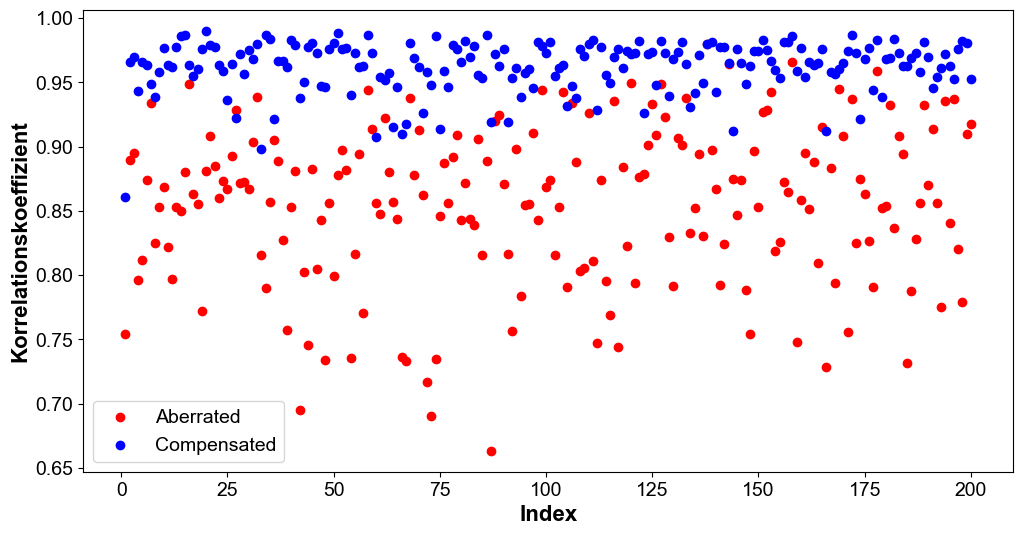

In [8]:
print(len(arr_abb))
print(len(arr_cor))
# Calculate the mean improvement
arr_abb = np.array(arr_abb)
arr_cor = np.array(arr_cor)

# Calculate the improvement for each pair of values
improvement = arr_cor - arr_abb


# Calculate the mean improvement
mean_improvement = np.mean(improvement)
mean_arr_abb = np.mean(arr_abb)
mean_arr_cor = np.mean(arr_cor)

# Print the mean improvement
print(f"Mean Improvement: {mean_improvement}")
print(f"Mean Correlationcoefficient Abberation: {mean_arr_abb}")
print(f"Mean Correlationcoefficient Correction: {mean_arr_cor}")

plt.figure(figsize=(12, 6))

plt.scatter(range(1, len(arr_abb) + 1), arr_abb, label="Aberrated", color='red')
plt.scatter(range(1, len(arr_cor) + 1), arr_cor, label="Compensated", color='blue')
#plt.title(" Camera 2 Aberrated vs Compensated", fontdict={'fontsize': 12, 'fontname': 'Arial', 'fontweight': 'bold'})
plt.xlabel("Index", fontdict={'fontsize': 16, 'fontname': 'Arial', 'fontweight': 'bold'})
plt.ylabel("Korrelationskoeffizient", fontdict={'fontsize': 16, 'fontname': 'Arial', 'fontweight': 'bold'})
plt.legend(fontsize=14)  # Adjusting legend font size
plt.xticks(fontsize=14)  # Adjusting x-tick labels font size
plt.yticks(fontsize=14)  # Adjusting y-tick labels font size
plt.show()

# Create compensated Phasemask

one test example

In [ ]:
import cv2
import imageio.v2 as iio
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from LightPipes import *
import math
 
# read an image 
img_orginal = iio.imread(r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\phasemask_unwrapped\1.png")
img_pre=iio.imread(r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\phasemask_unwrapped_predict_index_original_size\1_idx_predicted_phasemask_original_size_1.png")
# Output Images
from matplotlib.pyplot import figure
figure(figsize=(10, 12), dpi=300)
plt.subplot(1,2,1)
plt.imshow(img_orginal,cmap='gray')
print(np.max(img_orginal))
plt.subplot(1,2,2)
plt.imshow(img_pre,cmap='gray')
print(np.max(img_pre))
 
#change the phase profile from gray value to phase value with the orginal phase mask
 
phase_orginal=16/255*(img_orginal)       # change the gray value to 16
T=np.exp(1j*phase_orginal)
 
#change the phase profile from gray value to phase value with the predicted phase mask
 
phase_pre=16/255*(img_pre)       # change the gray value to 16
T=np.exp(-1j*phase_pre)
 
# generate the transmitted function and also the wrapped phase function to display on SLM
 
T=np.exp(1j*phase_orginal)*np.exp(-1j*phase_pre)
Phase_compensation=np.angle(T)
 
 
# plot all the three images
 
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(5, 5))
im1=ax1.imshow(phase_orginal,cmap='gray')
plt.colorbar(im1,shrink=0.6)
 
im2=ax2.imshow(phase_pre,cmap='gray')
plt.colorbar(im2,shrink=0.6)
 
im3=ax3.imshow(Phase_compensation,cmap='gray')
plt.colorbar(im3,shrink=0.6)

# Specify the file path where you want to save the image
output_file_path = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\output\compensated_phase.png"

# Save the compensated phase image
plt.imsave(output_file_path, Phase_compensation, cmap='gray')

In [ ]:
import cv2
import imageio.v2 as iio
import matplotlib.pyplot as plt
import numpy as np
from LightPipes import *
import math
import os
import glob

# Define base paths and file naming conventions
base_path_original = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\camera_1"
base_path_predicted = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\phasemask_unwrapped_predict_index_original_size"
output_base_path = r"\\srvditz1\lac\Studenten\AE_VoE_Stud\Sven Burckhard\Predict_Phasemask\Evaluation_Vortex\Test_Random_200_phasemasks\phasemask_unwrapped_compensated"

# List of indices to process#
indices = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12]  # Add more indices as needed
#indices = list(range(1,201))

for idx in indices:
    # Search for files with the given index
    original_files = glob.glob(os.path.join(base_path_original, f"{idx}_*.png"))
    predicted_files = glob.glob(os.path.join(base_path_predicted, f"{idx}_*.png"))
    
    if original_files and predicted_files:
        original_file = original_files[0]
        predicted_file = predicted_files[0]
        output_file = os.path.join(output_base_path, f"{idx}_idx_compensated_phase.png")

        # read an image 
        print(f'{original_file} vs {predicted_file}' )
        img_orginal = iio.imread(original_file)
        img_pre = iio.imread(predicted_file)
        
        # Change the phase profile from gray value to phase value with the original phase mask
        phase_orginal = 16 / 255 * (img_orginal)  # change the gray value to 16
        T = np.exp(1j * phase_orginal)
        
        # Change the phase profile from gray value to phase value with the predicted phase mask
        phase_pre = 16 / 255 * (img_pre)  # change the gray value to 16
        T = np.exp(-1j * phase_pre)
        
        # Generate the transmitted function and also the wrapped phase function to display on SLM
        T = np.exp(1j * phase_orginal) * np.exp(-1j * phase_pre)
        Phase_compensation = np.angle(T)
        print(f' Min: {np.min(Phase_compensation)} Max: {np.max(Phase_compensation)}')
        #print(f'{Phase_compensation.shape}')

        # change to gray image
        Phase_compensation =(Phase_compensation+np.pi)*255/(2*np.pi)
        print(f' Min: {np.min(Phase_compensation)} Max: {np.max(Phase_compensation)}')
        
        # Save the compensated phase image
        cv2.imwrite(output_file, Phase_compensation)

print("Processing complete.")
